Kelompok:
- Randy
- Tasya
- Fiqri
- Wildan

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import zipfile,os

In [73]:
# Download File
!wget -O 'Bike-sharing-dataset.zip' -r 'https://drive.google.com/uc?export=download&id=1MMe8NdTlvIVLLWihO6YN6hGC5OTJmzXc'

will be placed in the single file you specified.

--2024-02-13 17:44:52--  https://drive.google.com/uc?export=download&id=1MMe8NdTlvIVLLWihO6YN6hGC5OTJmzXc
Resolving drive.google.com (drive.google.com)... 142.250.159.102, 142.250.159.100, 142.250.159.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.159.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1MMe8NdTlvIVLLWihO6YN6hGC5OTJmzXc&export=download [following]
--2024-02-13 17:44:52--  https://drive.usercontent.google.com/download?id=1MMe8NdTlvIVLLWihO6YN6hGC5OTJmzXc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.234.132, 2607:f8b0:4001:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.234.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2004 (2.0K) [text/html]
Saving to: ‘Bike-sharing-dataset.zip’

Bike-sharing-datas

In [74]:
# Extract File
local_zip = '/content/Bike-sharing-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/bike-sharing')
zip_ref.close()

BadZipFile: File is not a zip file

# CREATE DATA FRAME

In [75]:
df = pd.read_csv('/content/bike-sharing/hour.csv') # Membaca data set hour.csv

In [76]:
df.head() #Menampilkan sebagian data dari atas

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [77]:
df.describe() #Menampilkan statistik standar (sum, count, max, min, avg, dsb)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [79]:
df.apply(lambda x: len(x.unique())) # Melihat nilai unik

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [80]:
df.isnull().sum() #Melihat apakah ada nilai kosong

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [81]:
# Menganti nama kolom
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [82]:
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [83]:
df = df.drop(columns = ['instant' , 'dteday' , 'year']) # hapus kolom yang tidak diperlukan

In [84]:
df.head()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [85]:
# Membuat list kolom
cols = ['season' , 'month' , 'hour' , 'holiday' , 'weekday' , 'workingday' , 'weather']

In [86]:
# Mengganti Dtype kolom menjadi Dtype Category
for col in cols:
    df[col] = df[col].astype('category')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


# Exploratory data analysis

[Text(0.5, 1.0, 'Jumlah sepeda selama weekdays dan weekends')]

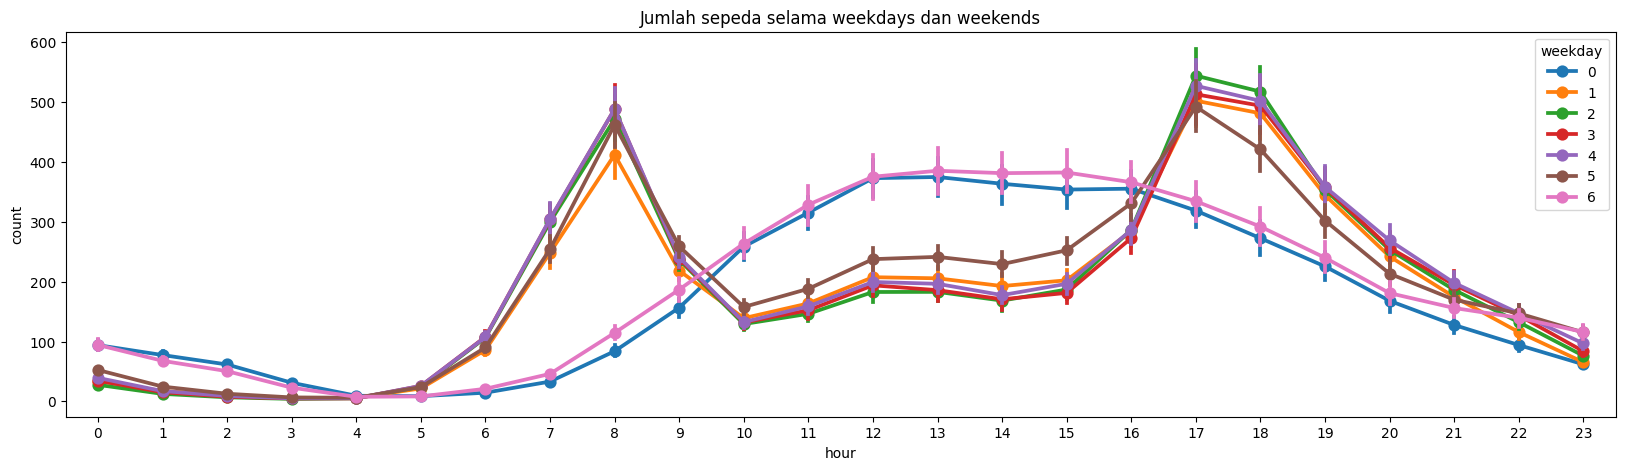

In [88]:
# Melihat pengaruh penggunaaan sepeda selama hari kerja dan hari libur
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Jumlah sepeda selama weekdays dan weekends')

[Text(0.5, 1.0, 'Jumlah sepeda selama weekdays dan weekends pada pengguna yang tidak terdaftar')]

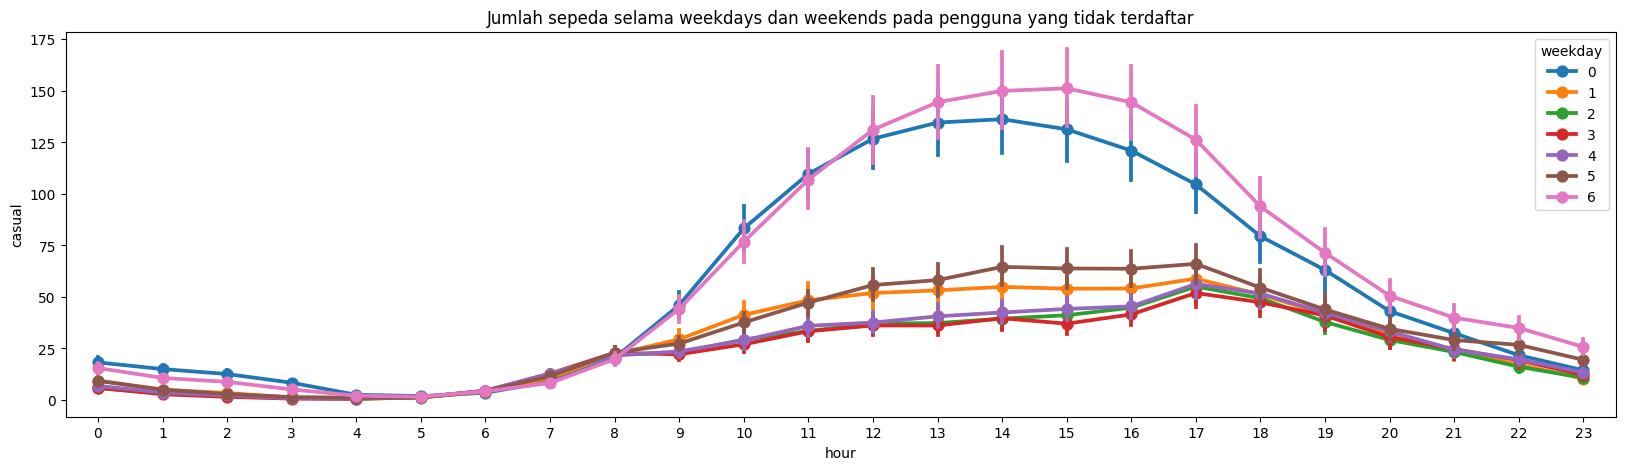

In [89]:
# Melihat pengaruh penggunaaan sepeda selama hari kerja dan hari libur pada pengguna yang tidak terdaftar
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Jumlah sepeda selama weekdays dan weekends pada pengguna yang tidak terdaftar')

[Text(0.5, 1.0, 'Jumlah sepeda selama weekdays dan weekends pada pengguna yang tidak terdaftar')]

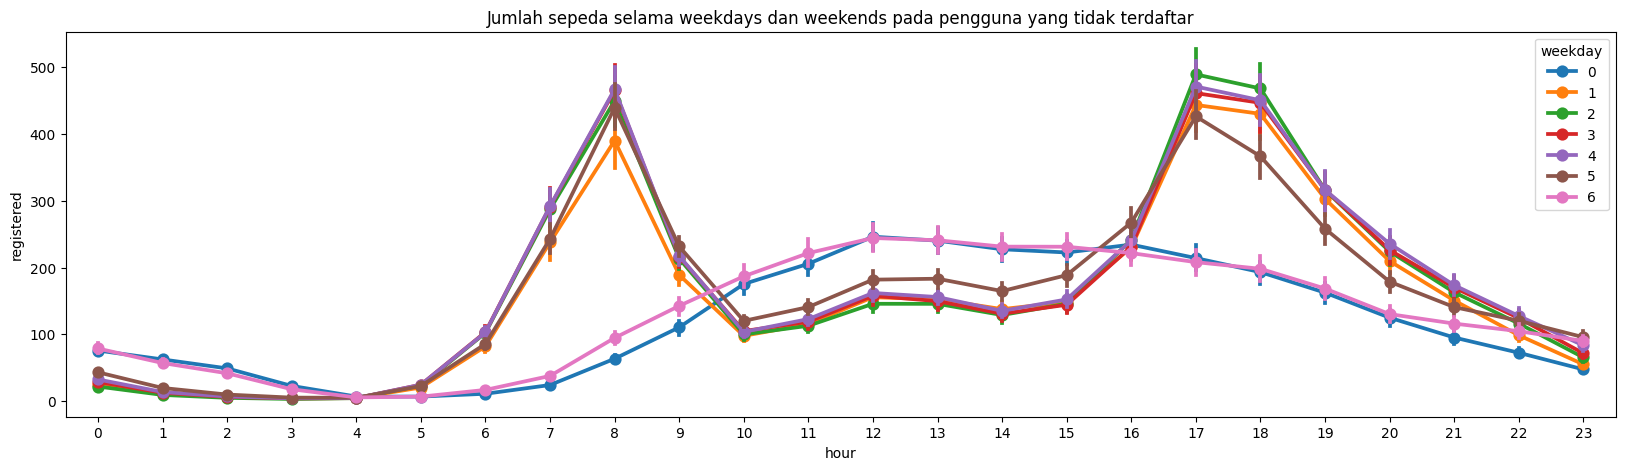

In [90]:
# Melihat pengaruh penggunaaan sepeda selama hari kerja dan hari libur pada pengguna yang terdaftar
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Jumlah sepeda selama weekdays dan weekends pada pengguna yang tidak terdaftar')

[Text(0.5, 1.0, 'Jumlah sepeda pada setiap cuaca')]

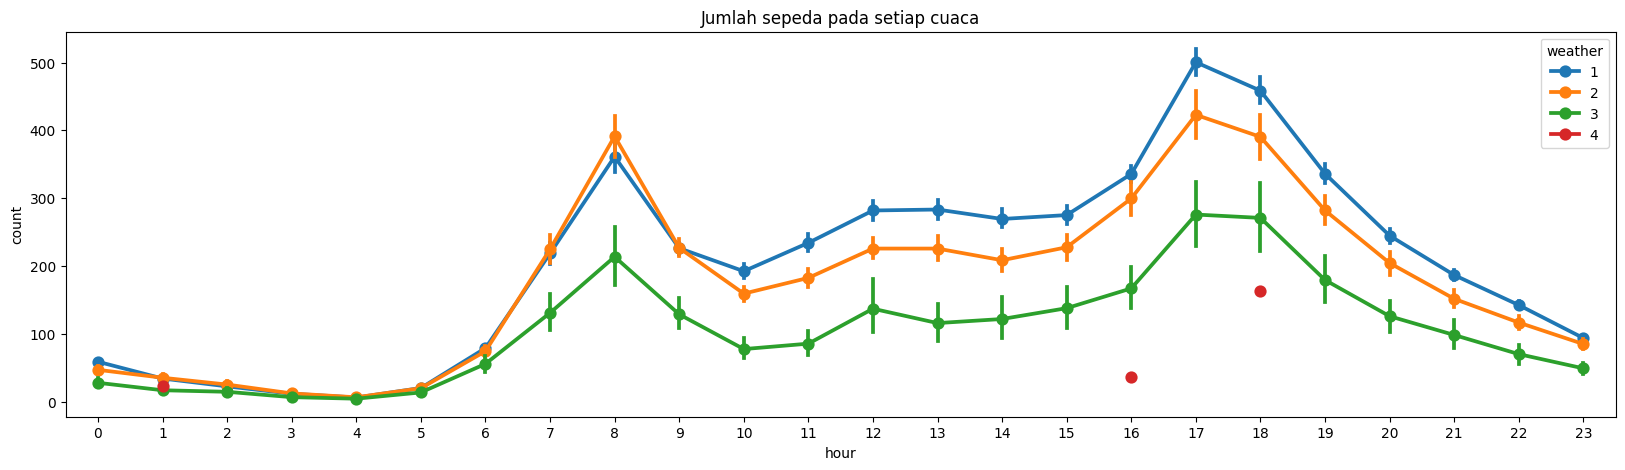

In [91]:
# Melihat pengaruh penggunaaan sepeda pada setiap cuaca
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Jumlah sepeda pada setiap cuaca')

[Text(0.5, 1.0, 'Jumlah sepeda pada setiap musim')]

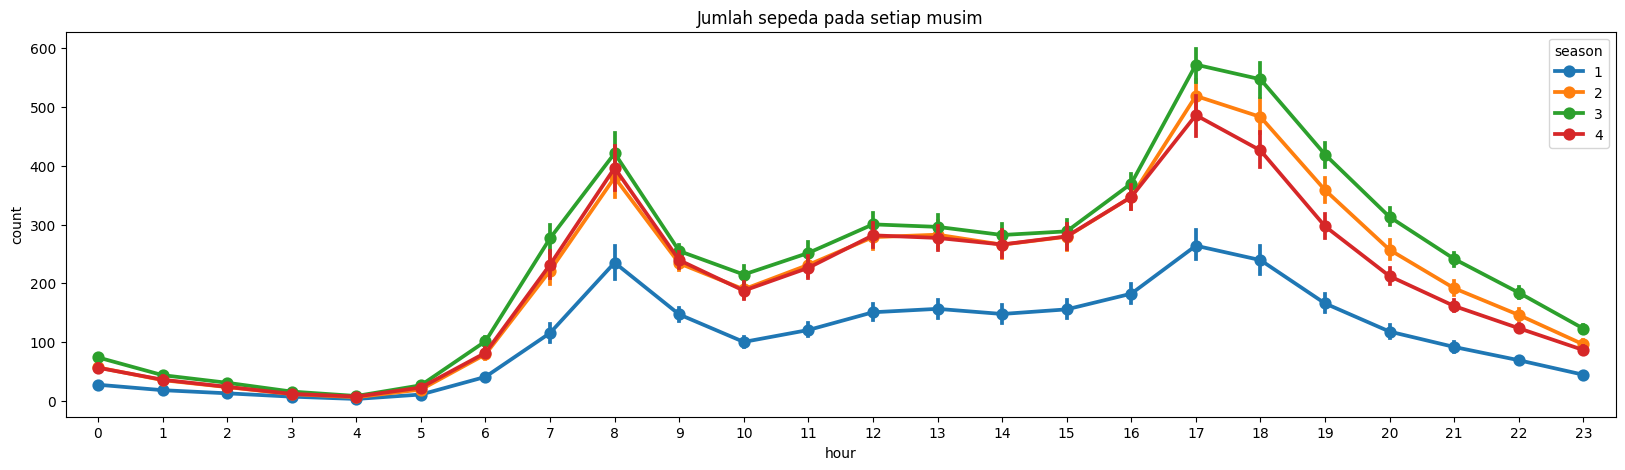

In [92]:
# Melihat pengaruh penggunaaan sepeda pada setiap musim
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Jumlah sepeda pada setiap musim')

[Text(0.5, 1.0, 'Jumlah sepeda pada setiap bulan')]

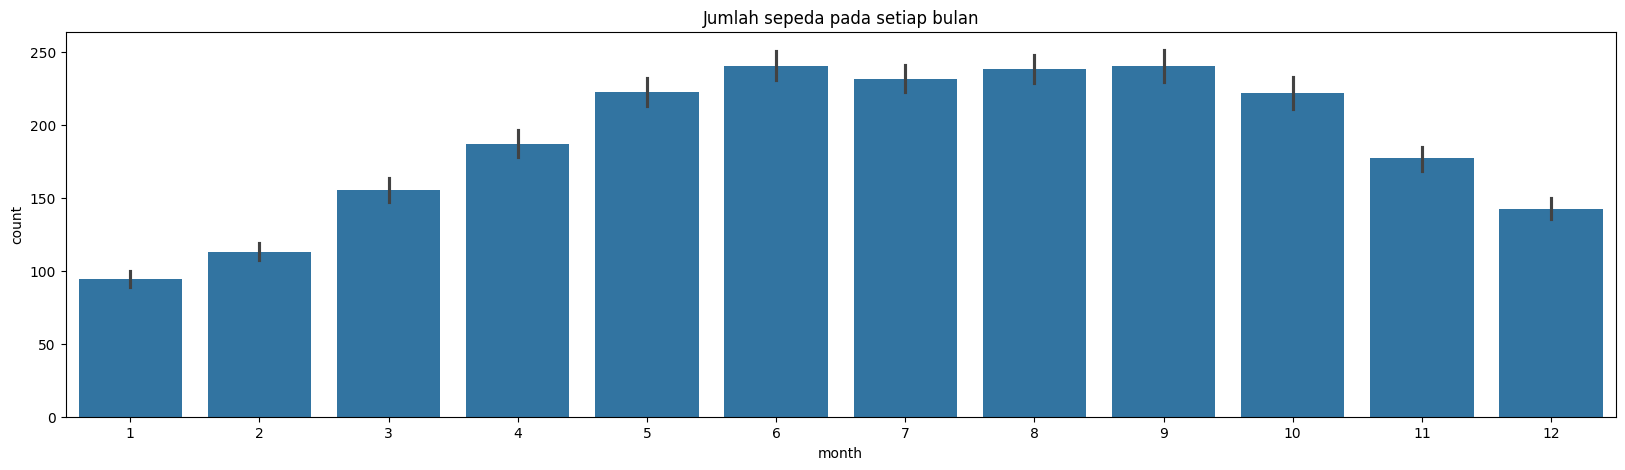

In [93]:
# Melihat pengaruh penggunaaan sepeda pada setiap bulan
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Jumlah sepeda pada setiap bulan')

[Text(0.5, 1.0, 'Jumlah sepeda pada setiap hari')]

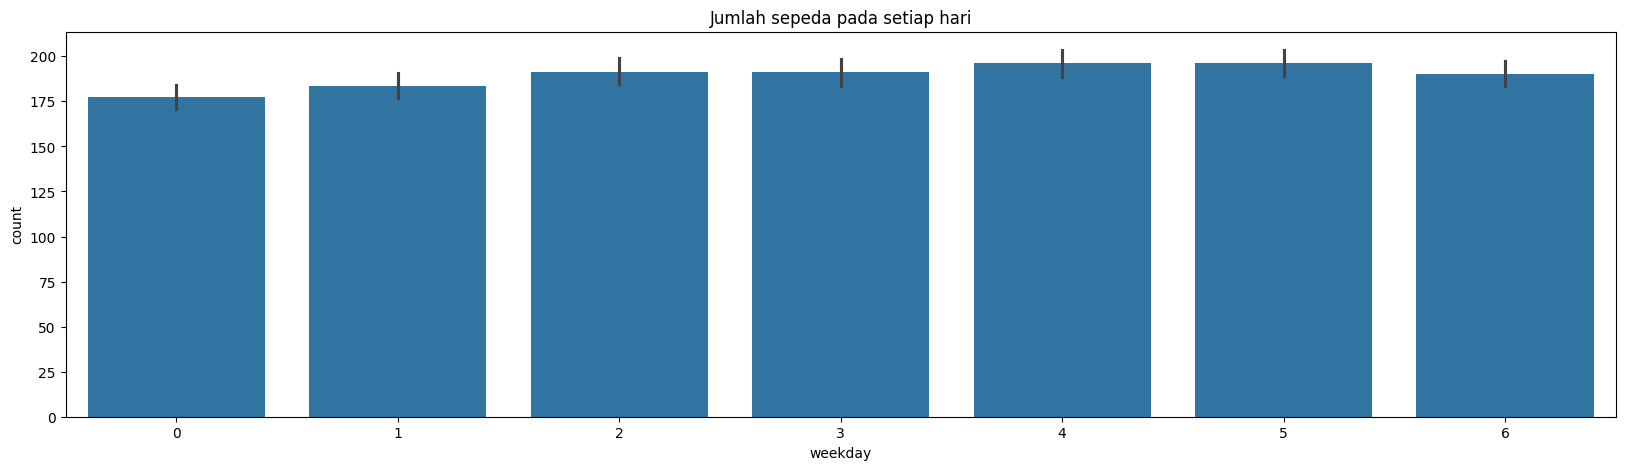

In [94]:
# Melihat pengaruh penggunaaan sepeda pada setiap hari
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Jumlah sepeda pada setiap hari')

[Text(0.5, 1.0, 'Relasi antara kelembapan dan pengguna')]

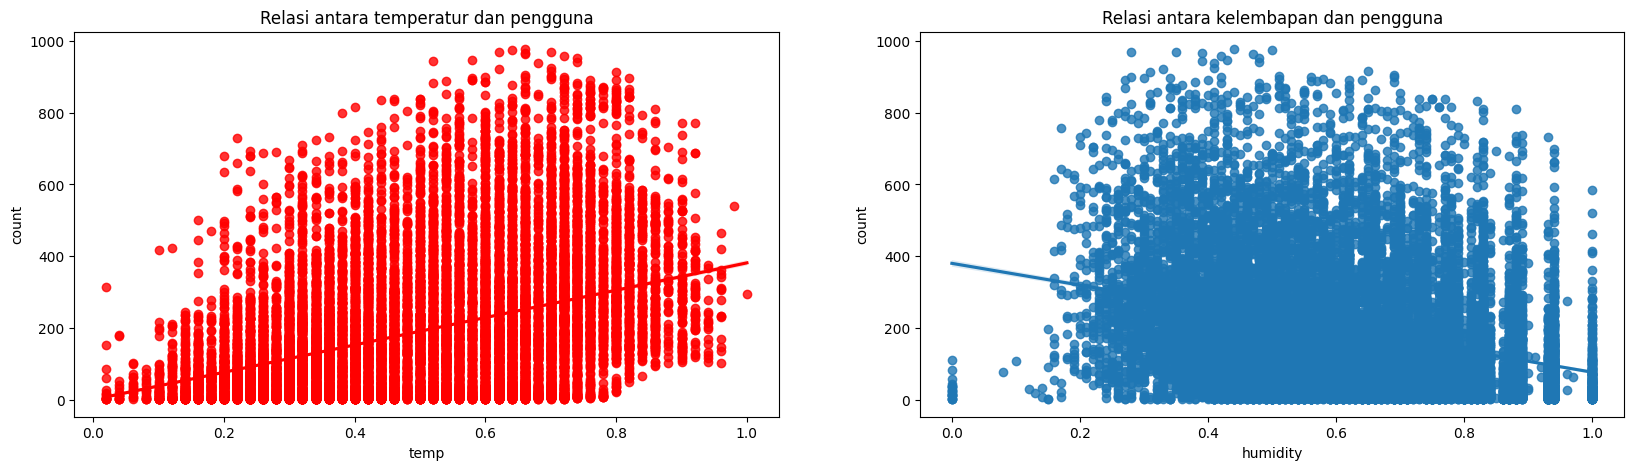

In [95]:
# Melihat relasi antara temperatur dan kelembapan pada jumlah peminjaman sepeda
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1 ,color='red')
ax1.set(title="Relasi antara temperatur dan pengguna")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relasi antara kelembapan dan pengguna")

In [96]:
from statsmodels.graphics.gofplots import qqplot

[Text(0.5, 1.0, 'Kuantil teoritis')]

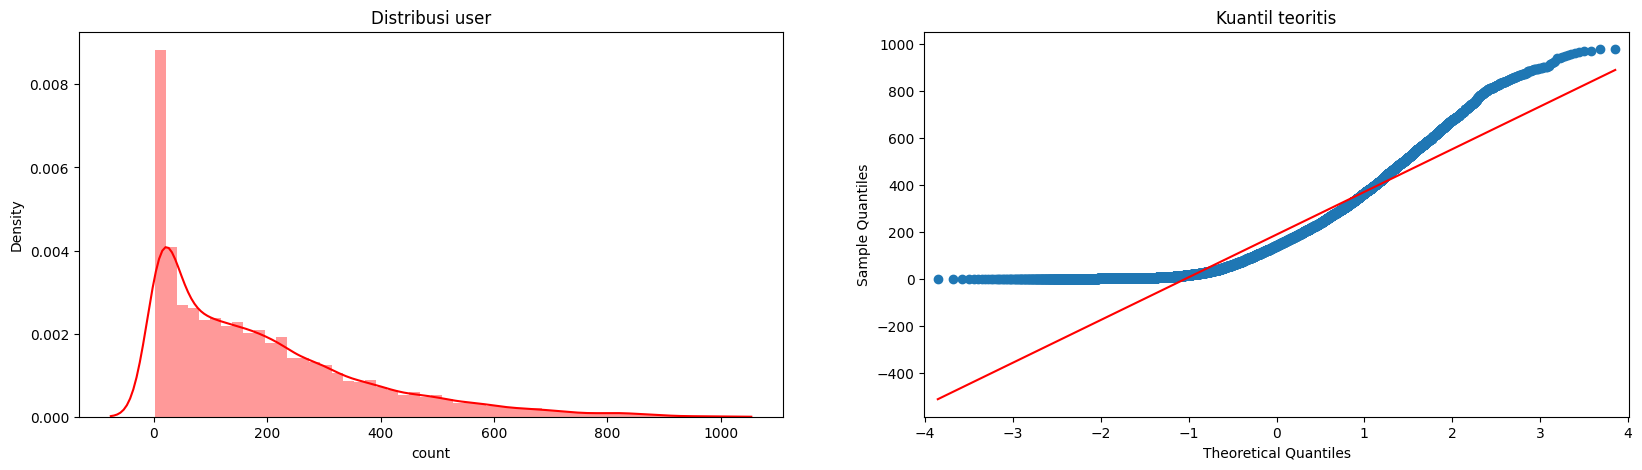

In [97]:
# Melihat distribusi user
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df['count'], ax=ax1 , color ='red')
ax1.set(title='Distribusi user')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Kuantil teoritis')

In [98]:
# transformasi log
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Kuantil teoritis')]

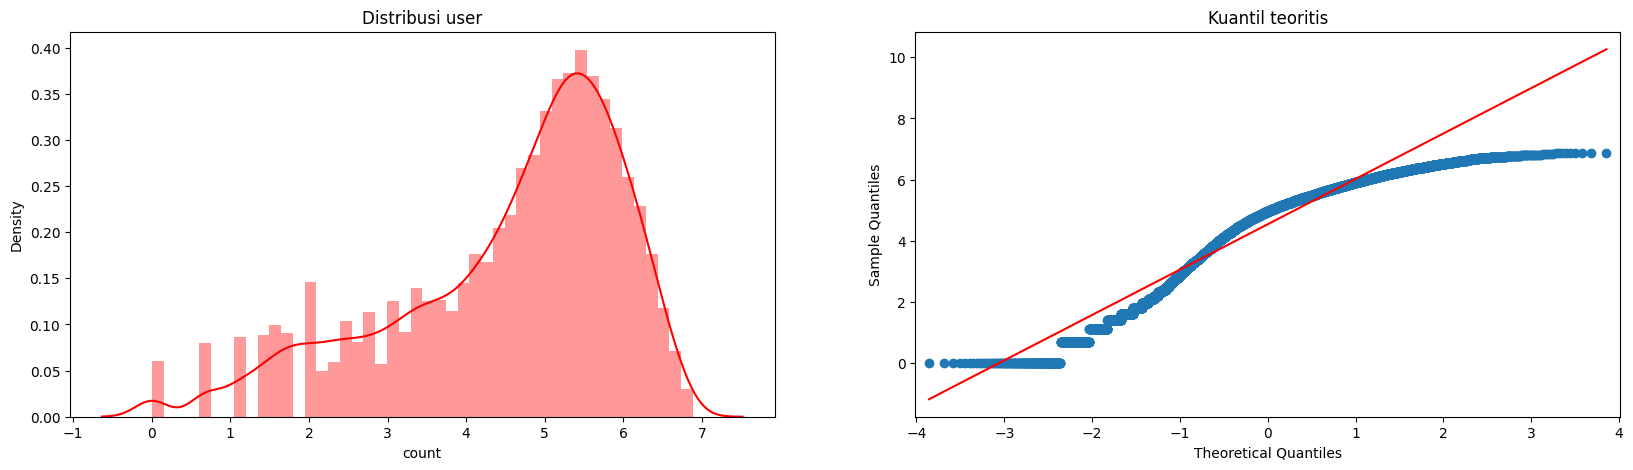

In [99]:
# Melihat distribusi user log
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df['count'], ax=ax1 , color ='red')
ax1.set(title='Distribusi user')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Kuantil teoritis')

<Axes: >

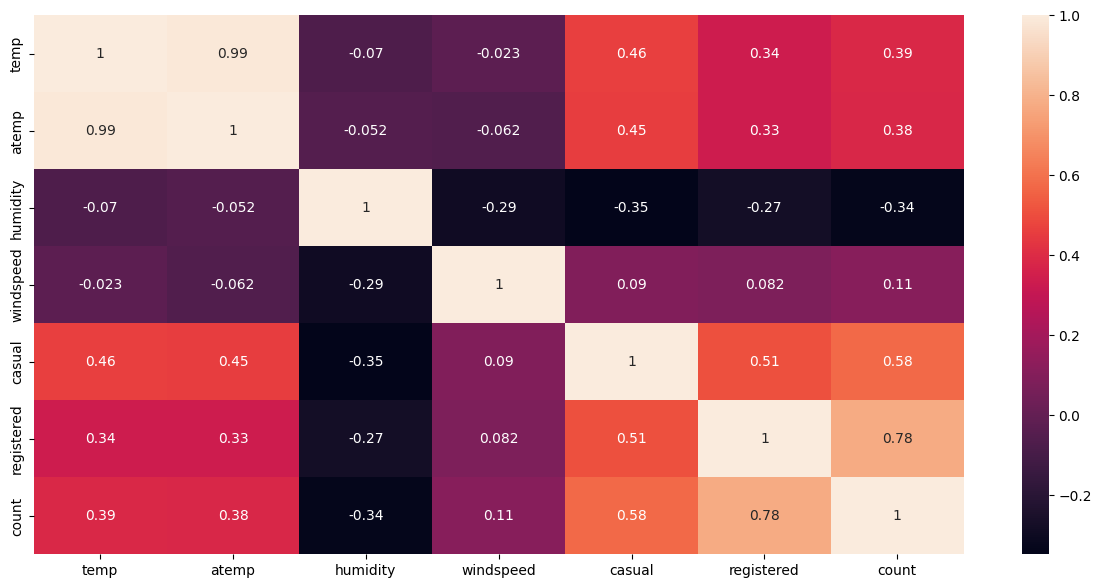

In [100]:
# Melihat korelasi setiap kolom pada jumlah peminjaman sepeda
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

# One Hot Encoding

In [101]:
# one hot encoding untuk kolom season
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [102]:
# one hot encoding untuk kolom lain, season, month, hour, holiday, weekday, workingday, weather

df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)

In [103]:
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [104]:
# Membuang kolom yang tidak diperlukan
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)

In [105]:
y = df_oh['count']

# Train Model

In [106]:
# import library untuk melatih model
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [107]:
# Model pelatihan regresi
models = [LinearRegression(),Ridge(),HuberRegressor(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor(),ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [108]:
from sklearn import model_selection

In [109]:
# Membuat method untuk metalih model
def train(model):
    kfold = model_selection.KFold(n_splits=5)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [110]:
# Melatih semua model dan melihat hasil regresi
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.6312697084228116
Model: Ridge()
CV score: 0.6304079414191432
Model: HuberRegressor()
CV score: 0.6603309580871269
Model: ElasticNetCV()
CV score: 0.6252222784219456
Model: DecisionTreeRegressor()
CV score: 0.6048627615558461
Model: RandomForestRegressor()
CV score: 0.39080820864108284
Model: ExtraTreesRegressor()
CV score: 0.4042016786800998
Model: GradientBoostingRegressor()
CV score: 0.4714300371061178


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# Memecah data untuk data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [113]:
# Memilih model pelatihan RandomForestRegressor() dikarena hasil regresi yang didapatkan kecil
model = RandomForestRegressor()

In [114]:
# Membuat Model
model.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
import joblib

In [119]:
# save
joblib.dump(model, "my_random_forest.joblib")

['my_random_forest.joblib']

In [121]:
# load
loaded_model = joblib.load("my_random_forest.joblib")

In [122]:
# Membuat prediksi dari model
y_pred = loaded_model.predict(X_test)

In [123]:
# Melihat error yang dihasilkan prediksi
error = y_test - y_pred

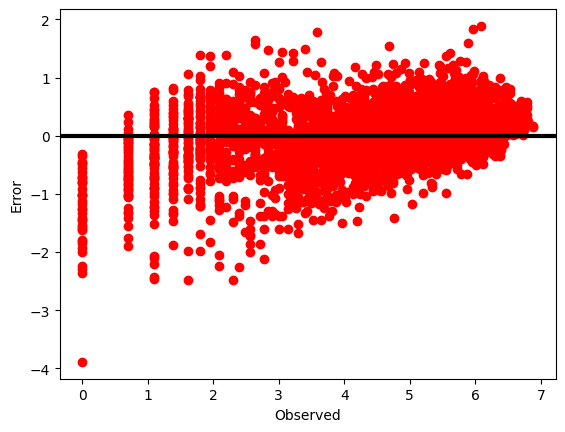

In [124]:
# Menampilkan Hasil error regresi
fig, ax = plt.subplots()
ax.scatter(y_test, error ,color = 'red')
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()